<a href="https://colab.research.google.com/github/hyunjin2123/BA_ToDo/blob/main/%5B%EC%83%81%ED%92%88_%EB%B3%80%EC%88%98_%EC%B6%95%EC%86%8C%5D_%EC%A2%85%EB%A1%9C%EA%B5%AC_%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC_%ED%8C%90%EB%A7%A4%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 나눔 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#런타임 다시 시작 후,
# matplotlib 폰트를 나눔 폰트로 지ㅣ정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련
import seaborn as sns           # Seaborn 로딩하기
import os.path
import pandas as pd
import numpy as np
import lightgbm                         #LGBM 활용 - 기존 tree 기반 알고리즘과 달리 tree구조가 수직적으로 확장 *GBM이란 틀린부분에 가중치를 더하면서 진행하는 알고리즘
from tqdm import tqdm
import warnings

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지

#한글 사용하는 방법 !! 
#1. 먼저 나눔 폰트 설치
#2. 전체 폰트 갯수 중  나눔 폰트 갯수가 뜨는지 확인
#3. 런타임-런타임 다시 시작 후, 차트 plot 다시 실행

#!apt-get update -qq
#!apt-get install fonts-nanum* -qq              

#sys_font=fm.findSystemFonts()
#print(f"sys_font number: {len(sys_font)}")
#print(sys_font)                               

#nanum_font = [f for f in sys_font if 'Nanum' in f]
#print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

In [ ]:
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)

plt.rc('font', family=font_name)
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

NanumSquare
['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liber

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=bd41d18415b087b44000520e0b5e7d68bc6b7d58eb483e3bf954ab937987b010
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
# 경고 끄기
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

## 데이터셋 만들기

In [ ]:
#GS25 상품 판매 데이터 불러오기

from pandas.core.frame import DataFrame

import pandas as pd

# csv 데이터 가져오기
df_GS25 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/최종과제/GS25.csv", encoding="cp949")

print(df_GS25.columns)
print(df_GS25.info())      #데이터정보파악 행, 열, 결측치 등
display(df_GS25.head(5))    #처음 5행 확인

Index(['korea_cvs.pvn_nm', 'korea_cvs.sale_dt', 'korea_cvs.gen_cd',
       'korea_cvs.age_cd', 'korea_cvs.category', 'korea_cvs.adj_qty',
       'korea_cvs.bor_nm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707786 entries, 0 to 2707785
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   korea_cvs.pvn_nm    object
 1   korea_cvs.sale_dt   int64 
 2   korea_cvs.gen_cd    object
 3   korea_cvs.age_cd    object
 4   korea_cvs.category  object
 5   korea_cvs.adj_qty   int64 
 6   korea_cvs.bor_nm    object
dtypes: int64(2), object(5)
memory usage: 144.6+ MB
None


,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [ ]:
df_GS25.columns=['광역시','ymd','성별','연령대','상품','수량','시군구']
df_GS25

,광역시,ymd,성별,연령대,상품,수량,시군구
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구
...,...,...,...,...,...,...,...
2707781,경기도,20181230,M,40~59,과자,7,여주시이천시
2707782,경기도,20181231,F,00~19,맥주,7,여주시이천시
2707783,경기도,20181231,F,20~39,생리대,7,여주시이천시
2707784,경기도,20181231,F,60~99,생리대,7,여주시이천시


In [ ]:
df_GS25['시군구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '동구', '미추홀구',
       '연수구', '남동구', '부평구', '계양구', '서구', '강화군', '옹진군', '수원시', '성남시',
       '의정부시', '안양시', '부천시', '광명시', '안산시', '고양시', '과천시', '구리시', '남양주시',
       '시흥시', '군포시', '의왕시', '하남시', '용인시', '파주시', '김포시', '화성시', '광주시',
       '오산시안성시평택시', '양주시', '동두천시', '연천군포천군', '가평군양평군', '여주시이천시'],
      dtype=object)

In [ ]:
#종로구 자료만 선택
df_GS25_temp = df_GS25[df_GS25['시군구'] == '종로구'] # 시군구 열이 '종로구'인 행들만 추출
df_GS25_temp

,광역시,ymd,성별,연령대,상품,수량,시군구
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구
...,...,...,...,...,...,...,...
2519452,서울특별시,20181231,M,00~19,면도기,7,종로구
2519453,서울특별시,20181231,M,20~39,생리대,7,종로구
2519454,서울특별시,20181231,M,20~39,스타킹,7,종로구
2519455,서울특별시,20181231,M,40~59,마스크,7,종로구


In [ ]:
df_GS25_temp = df_GS25_temp.drop(['광역시','성별','연령대','시군구'], axis=1)
df_GS25_temp

,ymd,상품,수량
0,20160101,라면,7
1,20160101,과자,655
2,20160101,라면,282
3,20160101,마스크,35
4,20160101,맥주,183
...,...,...,...
2519452,20181231,면도기,7
2519453,20181231,생리대,7
2519454,20181231,스타킹,7
2519455,20181231,마스크,7


In [ ]:
df_GS25_temp.groupby(['ymd','상품']).수량.sum()

ymd       상품   
20160101  과자       1500
          라면        818
          마스크        56
          맥주        499
          면도기         7
                   ... 
20181231  생수        353
          숙취해소제       7
          스타킹        35
          아이스크림     239
          탄산음료      126
Name: 수량, Length: 11978, dtype: int64

In [ ]:
product = pd.DataFrame(df_GS25_temp.groupby(['ymd','상품']).수량.sum()).reset_index()
df_GS25_final = product.pivot('ymd','상품','수량').fillna(0)
df_GS25_final

상품,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
ymd,,,,,,,,,,,,
20160101,1500.0,818.0,56.0,499.0,7.0,85.0,274.0,35.0,28.0,514.0,0.0,98.0
20160102,1536.0,718.0,21.0,514.0,0.0,141.0,281.0,49.0,21.0,366.0,0.0,126.0
20160103,1437.0,853.0,14.0,380.0,42.0,77.0,345.0,21.0,28.0,578.0,0.0,105.0
20160104,1297.0,973.0,7.0,282.0,14.0,113.0,217.0,14.0,14.0,401.0,0.0,147.0
20160105,1395.0,937.0,0.0,360.0,7.0,77.0,253.0,105.0,35.0,408.0,0.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,1008.0,1289.0,21.0,289.0,14.0,42.0,239.0,49.0,14.0,415.0,0.0,98.0
20181228,1536.0,1212.0,35.0,380.0,14.0,77.0,359.0,126.0,21.0,296.0,0.0,133.0
20181229,1289.0,746.0,21.0,268.0,7.0,49.0,401.0,42.0,21.0,232.0,0.0,49.0


In [ ]:
df_GS25_final = df_GS25_final.drop(['과자', '라면', '마스크', '맥주', '면도기', '생리대', '생수', '숙취해소제', '스타킹', '우산', '탄산음료'], axis=1)
df_GS25_final

상품,아이스크림
ymd,
20160101,514.0
20160102,366.0
20160103,578.0
20160104,401.0
20160105,408.0
...,...
20181227,415.0
20181228,296.0
20181229,232.0


In [ ]:
print(df_GS25_final.describe())

상품           아이스크림
count  1096.000000
mean    967.811131
std     656.202305
min     133.000000
25%     415.000000
50%     776.000000
75%    1418.750000
max    3552.000000


In [ ]:
#기상청 기상 데이터 불러오기

# csv 데이터 가져오기
df_wether = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/최종과제/기상데이터.csv", encoding="cp949")

print(df_wether.columns)
print(df_wether.info())      #데이터정보파악 행, 열, 결측치 등
display(df_wether.head(5))      #처음 5행 확인

Index(['bigcon_weather.tm', 'bigcon_weather.stn_id', 'bigcon_weather.pvn_nm',
       'bigcon_weather.bor_nm', 'bigcon_weather.max_ta',
       'bigcon_weather.max_ws', 'bigcon_weather.min_ta',
       'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm',
       'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bigcon_weather.tm       59113 non-null  int64  
 1   bigcon_weather.stn_id   59113 non-null  int64  
 2   bigcon_weather.pvn_nm   59113 non-null  object 
 3   bigcon_weather.bor_nm   59113 non-null  object 
 4   bigcon_weather.max_ta   58826 non-null  float64
 5   bigcon_weather.max_ws   58778 non-null  float64
 6   bigcon_weather.min_ta   58826 non-null  float64
 7   bigcon_weather.avg_ta   58814 non-null  float64
 8   bigcon_weather.avg_rhm  43

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [ ]:
df_wether_temp = df_wether.drop(columns = ['bigcon_weather.stn_id','bigcon_weather.max_ta','bigcon_weather.max_ws','bigcon_weather.min_ta'])
df_wether_temp.columns=['ymd','광역시','시군구','평균기온','습도','평균풍속','강수량']
df_wether_temp.head()

,ymd,광역시,시군구,평균기온,습도,평균풍속,강수량
0,20160101,경기도,동두천시,-0.2,74.0,0.9,0.0
1,20160102,경기도,동두천시,5.4,70.0,1.3,0.0
2,20160103,경기도,동두천시,4.7,82.0,0.7,0.0
3,20160104,경기도,동두천시,1.9,55.0,2.2,0.0
4,20160105,경기도,동두천시,-2.8,36.0,1.8,0.0


In [ ]:
#기상데이터도 종로구 자료만 선택
df_wether_final = df_wether_temp[df_wether_temp['시군구'] == '종로구'] # 시군구 열이 '종로구'인 행들만 추출
df_wether_final.head(10)

,ymd,광역시,시군구,평균기온,습도,평균풍속,강수량
2192,20160101,서울특별시,종로구,1.2,73.0,1.6,0.0
2193,20160102,서울특별시,종로구,5.7,77.0,2.0,0.0
2194,20160103,서울특별시,종로구,6.5,81.0,1.8,0.0
2195,20160104,서울특별시,종로구,2.0,54.0,3.1,0.0
2196,20160105,서울특별시,종로구,-2.7,39.0,2.3,0.0
2197,20160106,서울특별시,종로구,-1.7,54.0,1.8,0.0
2198,20160107,서울특별시,종로구,-3.4,52.0,2.5,0.0
2199,20160108,서울특별시,종로구,-3.3,50.0,2.0,0.0
2200,20160109,서울특별시,종로구,-2.1,57.0,2.1,0.0
2201,20160110,서울특별시,종로구,0.3,42.0,2.6,0.0


In [ ]:
df_wether_final = df_wether_final.drop(['광역시','시군구',], axis=1)
df_wether_final.tail()

,ymd,평균기온,습도,평균풍속,강수량
3283,20181227,-10.1,28.0,3.5,0.0
3284,20181228,-10.5,33.0,2.5,0.0
3285,20181229,-7.6,29.0,2.9,0.0
3286,20181230,-6.8,36.0,1.2,0.0
3287,20181231,-5.4,40.0,1.2,0.0


In [ ]:
df_wether_final = df_wether_final.fillna(0)
df_wether_final.isnull().sum()

ymd     0
평균기온    0
습도      0
평균풍속    0
강수량     0
dtype: int64

In [ ]:
#gs 데이터와 기상 데이터 결합하기

df = pd.merge( df_wether_final, df_GS25_final,on="ymd", how="left")
df.info()  #1096개 데이터로 3년 모두 포함되어 있음을 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymd     1096 non-null   int64  
 1   평균기온    1096 non-null   float64
 2   습도      1096 non-null   float64
 3   평균풍속    1096 non-null   float64
 4   강수량     1096 non-null   float64
 5   아이스크림   1096 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.9 KB


,ymd,평균기온,습도,평균풍속,강수량,아이스크림
0,20160101,1.2,73.0,1.6,0.0,514.0
1,20160102,5.7,77.0,2.0,0.0,366.0
2,20160103,6.5,81.0,1.8,0.0,578.0
3,20160104,2.0,54.0,3.1,0.0,401.0
4,20160105,-2.7,39.0,2.3,0.0,408.0


In [ ]:
from datetime import datetime
df['ymd']= df['ymd'].astype('str')
df['ymd'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1091   2018-12-27
1092   2018-12-28
1093   2018-12-29
1094   2018-12-30
1095   2018-12-31
Name: ymd, Length: 1096, dtype: datetime64[ns]

In [ ]:
df.set_index('ymd', inplace=True)
df

,평균기온,습도,평균풍속,강수량,아이스크림
ymd,,,,,
20160101,1.2,73.0,1.6,0.0,514.0
20160102,5.7,77.0,2.0,0.0,366.0
20160103,6.5,81.0,1.8,0.0,578.0
20160104,2.0,54.0,3.1,0.0,401.0
20160105,-2.7,39.0,2.3,0.0,408.0
...,...,...,...,...,...
20181227,-10.1,28.0,3.5,0.0,415.0
20181228,-10.5,33.0,2.5,0.0,296.0
20181229,-7.6,29.0,2.9,0.0,232.0


In [ ]:
print(df.columns) #

Index(['평균기온', '습도', '평균풍속', '강수량', '아이스크림'], dtype='object')


##데이터 탐색


In [ ]:
# 기술통계 확인하기
print(df.describe())

              평균기온          습도         평균풍속          강수량        아이스크림
count  1096.000000  1096.00000  1096.000000  1096.000000  1096.000000
mean     13.223358    58.05292     2.067792     3.167427   967.811131
std      11.166435    14.53030     0.708135    12.686887   656.202305
min     -14.800000    22.00000     0.000000     0.000000   133.000000
25%       3.475000    47.00000     1.600000     0.000000   415.000000
50%      14.650000    58.00000     2.000000     0.000000   776.000000
75%      22.900000    68.00000     2.500000     0.000000  1418.750000
max      33.700000    97.00000     5.400000   144.500000  3552.000000


In [ ]:
# 상관계수 확인하기 1 - 매트릭스 형태
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,평균기온,습도,평균풍속,강수량,아이스크림
평균기온,1.00,0.41,-0.19,0.15,0.82
습도,0.41,1.00,-0.13,0.45,0.19
평균풍속,-0.19,-0.13,1.00,0.04,-0.09
강수량,0.15,0.45,0.04,1.00,-0.00
아이스크림,0.82,0.19,-0.09,-0.00,1.00


In [ ]:
# 상관계수 확인하기 2 - 시리즈 형태
s = corr_df.unstack()
s

평균기온   평균기온     1.00
       습도       0.41
       평균풍속    -0.19
       강수량      0.15
       아이스크림    0.82
습도     평균기온     0.41
       습도       1.00
       평균풍속    -0.13
       강수량      0.45
       아이스크림    0.19
평균풍속   평균기온    -0.19
       습도      -0.13
       평균풍속     1.00
       강수량      0.04
       아이스크림   -0.09
강수량    평균기온     0.15
       습도       0.45
       평균풍속     0.04
       강수량      1.00
       아이스크림   -0.00
아이스크림  평균기온     0.82
       습도       0.19
       평균풍속    -0.09
       강수량     -0.00
       아이스크림    1.00
dtype: float64

In [ ]:
# 상관계수 확인하기 3 - DataFrame의 style프로퍼티 형태
corr_df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_df.style.background_gradient(cmap='viridis')    # 0.4 이상을 유의미하다고 봄

,,corr
평균기온,아이스크림,0.820000
아이스크림,평균기온,0.820000
습도,강수량,0.450000
강수량,습도,0.450000
평균기온,습도,0.410000
습도,평균기온,0.410000
아이스크림,습도,0.190000
습도,아이스크림,0.190000
강수량,평균기온,0.150000
평균기온,강수량,0.150000


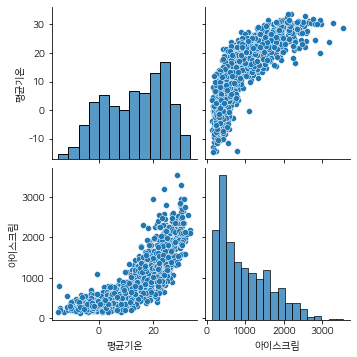

In [ ]:
# scatter
cols = ["평균기온","아이스크림"]
sns.pairplot(df[cols])
plt.show()

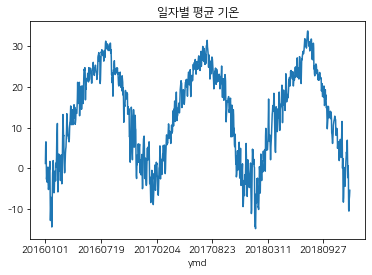

In [ ]:
df['평균기온'].plot(title = '일자별 평균 기온')

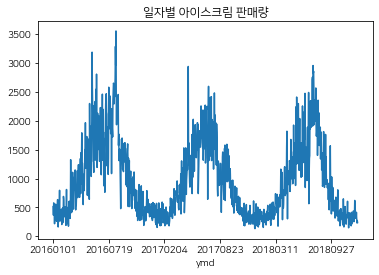

In [ ]:
df['아이스크림'].plot(title = '일자별 아이스크림 판매량')

#회귀분석

In [ ]:
# Python ≥3.5 이상을 권장
import sys
print("Python version: {}".format(sys.version))

# Scikit-Learn ≥0.20 이상을 권장
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scikit-learn version: 1.0.2


## 데이터 전처리
 - 학습/테스트데이터 분할
 - 독립변수 표준화 수행


In [ ]:
exp_df = df
display(exp_df.head(3))
exp_df.describe()  #변수 scale확인
print(exp_df.isnull().sum())  #결측치 확인

,평균기온,습도,평균풍속,강수량,아이스크림
ymd,,,,,
20160101,1.2,73.0,1.6,0.0,514.0
20160102,5.7,77.0,2.0,0.0,366.0
20160103,6.5,81.0,1.8,0.0,578.0


평균기온     0
습도       0
평균풍속     0
강수량      0
아이스크림    0
dtype: int64


In [ ]:
y = exp_df["아이스크림"]
X = exp_df.iloc[:,0:-1]
display(X.head())

,평균기온,습도,평균풍속,강수량
ymd,,,,
20160101,1.2,73.0,1.6,0.0
20160102,5.7,77.0,2.0,0.0
20160103,6.5,81.0,1.8,0.0
20160104,2.0,54.0,3.1,0.0
20160105,-2.7,39.0,2.3,0.0


In [ ]:
# 학습 / 테스트데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# 독립변수 표준화 
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
s_scaler.fit_transform(X_train)
s_scaler.transform(X_test)

array([[-1.44047491e+00,  1.03313798e+00,  3.61844965e+00,
        -5.38108268e-02],
       [ 1.42881065e+00,  1.24224816e+00,  3.28979653e-01,
        -2.10416422e-01],
       [-1.00873288e+00, -1.19737063e+00,  1.85959218e-01,
        -2.49567821e-01],
       [ 5.20353464e-01, -6.39743480e-01,  1.04408183e+00,
        -2.49567821e-01],
       [ 6.01305095e-01, -5.00336692e-01, -2.43102086e-01,
        -2.49567821e-01],
       [ 8.86114369e-02, -9.88260450e-01, -2.43102086e-01,
        -1.46594279e-02],
       [-1.44047491e+00, -2.91226509e-01, -6.72163391e-01,
        -2.49567821e-01],
       [-1.26058240e+00, -1.54588760e+00,  1.18710226e+00,
        -2.49567821e-01],
       [-2.35195084e-01,  6.14917613e-01,  3.76147009e+00,
         1.35563953e+00],
       [ 3.40460953e-01, -4.30633298e-01, -1.00081651e-01,
        -2.49567821e-01],
       [ 7.54213729e-01,  8.24027796e-01, -6.72163391e-01,
        -2.49567821e-01],
       [ 6.82256725e-01,  1.66046852e+00, -1.10122470e+00,
      

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [ ]:
train_performance = lr_model.score(X_train, y_train)
test_performance = lr_model.score(X_test, y_test)
print("아이스크림 판매량 예측결과: \n", y_predict[0:10])
print("훈련 성능: {}   테스트 성능: {}".format(train_performance, test_performance))
print(X_train.columns)

np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한
print("회귀식: {}  절편: {}".format(lr_model.coef_, lr_model.intercept_))

#독립변수가 종속변수의 변동을 72.7% 설명
#그러나, 머신러닝에서는 MAE, RMSE를 더 중요한 성능으로 고려함

아이스크림 판매량 예측결과: 
 [ 170.62 1734.21  503.14 1392.18 1378.93 1108.75  134.05  422.88  868.73
 1223.57]
훈련 성능: 0.7031218128308114   테스트 성능: 0.679679307023054
Index(['평균기온', '습도', '평균풍속', '강수량'], dtype='object')
회귀식: [53.3  -6.21 54.23 -3.27]  절편: 521.061884707053


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#mean_absolute_error(실제, 예측)
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#MAE기준으로 해석하면, 회귀식이 평균적으로 예측한 아이스크림판매량은 실제값과 약 539개 정도 오차가 있음.

MAE: 273.1453734400429
RMSE: 126497.2212375221


## Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree = 2, include_bias = False)  #2제곱까지, include_bias = False 절편은 포함 안함. 회귀식에서 자동으로 포함하니 불필요
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

print(train_poly.shape)
print(test_poly.shape)
poly.get_feature_names()

In [ ]:
lr_model2 = LinearRegression()
lr_model2.fit(train_poly, y_train)
y_predict = lr_model2.predict(test_poly)
train_performance2 = lr_model2.score(train_poly, y_train)
test_performance2 = lr_model2.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance2, test_performance2))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#R2가 향상되었으며, 오차율이 줄어듦
#실제 아이스크림 판매량과 예측 아이스크림 판매량이 평균 438개 정도 차이남

훈련 성능: 0.7847313434074471   테스트 성능: 0.7699666076136715
MAE: 217.28549410481753
RMSE: 90842.03913983602


In [ ]:
# 학습/테스트 : 층화 추출
# 회귀식 변수 선택 *


# 구체적인 모형의 도출
import numpy as np
np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한

print("회귀계수: {}  절편:{}".format(lr_model2.coef_, lr_model2.intercept_))

회귀계수: [ 36.11 -23.45 168.26  10.11   1.86  -0.53   0.93  -0.05   0.19   1.82
  -0.15 -48.04  -2.47   0.07]  절편:710.6155731450847


##회귀분석 - sklearn 이용 - Ridge & Lasso 회귀분석

In [ ]:
from sklearn.linear_model import Ridge  #Lasso는 Ridge를 Lasso로만 변경

Ridge = Ridge(alpha = 0.3)
Ridge.fit(train_poly, y_train)
y_predict = Ridge.predict(test_poly)
train_performance3 = Ridge.score(train_poly, y_train)
test_performance3 = Ridge.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance3, test_performance3))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

print("회귀계수: {}  절편:{}".format(Ridge.coef_, Ridge.intercept_))

# 학습/테스트 데이터 변동 없음
#MAE도 동일

훈련 성능: 0.7847305607939883   테스트 성능: 0.7698618524445837
MAE: 217.3180439787897
RMSE: 90883.40779971474
회귀계수: [ 36.06 -23.61 162.25  10.24   1.86  -0.53   0.94  -0.05   0.19   1.87
  -0.15 -47.38  -2.5    0.07]  절편:721.4956773774288


In [ ]:
from sklearn.linear_model import Lasso  #Lasso는 Ridge를 Lasso로만 변경

Lasso = Lasso(alpha = 0.3)
Lasso.fit(train_poly, y_train)
y_predict = Lasso.predict(test_poly)
train_performance3 = Lasso.score(train_poly, y_train)
test_performance3 = Lasso.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance3, test_performance3))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

print("회귀계수: {}  절편:{}".format(Lasso.coef_, Lasso.intercept_))

# 학습/테스트 데이터 변동 없음
#MAE도 동일

훈련 성능: 0.7847068954724186   테스트 성능: 0.7693605210160719
MAE: 217.45202383221516
RMSE: 91081.38761811612
회귀계수: [ 35.72 -23.99 135.5   10.22   1.86  -0.53   1.02  -0.05   0.19   2.06
  -0.15 -44.12  -2.61   0.07]  절편:762.5158448479781
